# Libraries

In [69]:
import sys
import sklearn
%matplotlib inline
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, SpectralEmbedding, LocallyLinearEmbedding
from sklearn.manifold import Isomap
import pandas as pd
import numpy as np
from sklearn.manifold import SpectralEmbedding
from sklearn.metrics.pairwise import polynomial_kernel
import matplotlib.pyplot as plt

# Version

In [46]:
print("Python version")
print(sys.version)
print("Python Version info.")
print(sys.version_info)
print('sklearn: {}'.format(sklearn.__version__))

Python version
3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Python Version info.
sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)
sklearn: 1.2.1


# Dataset

In [47]:
circle_csv = pd.read_csv("data/circles0.3.csv")
spiral_csv = pd.read_csv("data/spiral1.csv")
moons_csv = pd.read_csv("data/moons1.csv")
halfkernel_csv = pd.read_csv("data/halfkernel.csv")
twogaussians42_csv = pd.read_csv("data/twogaussians42.csv")

X_circle = circle_csv[['x1', 'x2']].values
y_circle = circle_csv['label'].values

X_spiral = spiral_csv[['x', 'y']].values
y_spiral = spiral_csv['label'].values

X_moons = moons_csv[['x1', 'x2']].values
y_moons = moons_csv['label'].values

X_halfkernel = halfkernel_csv[['x1', 'x2']].values
y_halfkernel = halfkernel_csv['label'].values

X_twogaussians42 = twogaussians42_csv[['x1', 'x2']].values
y_twogaussians42 = twogaussians42_csv['label'].values

In [48]:
circle_csv_0 = circle_csv[(circle_csv['label'] == 0)]
circle_csv_1 = circle_csv[(circle_csv['label'] == 1)]
cdf_circle_0 = circle_csv_0[['x1', 'x2']]
cdf_circle_1 = circle_csv_1[['x1', 'x2']]

spiral_csv_0 = spiral_csv[(spiral_csv['label'] == 0)]
spiral_csv_1 = spiral_csv[(spiral_csv['label'] == 1)]
cdf_spiral_0 = spiral_csv_0[['x', 'y']]
cdf_spiral_1 = spiral_csv_1[['x', 'y']]

moons_csv_0 = moons_csv[(moons_csv['label'] == 0)]
moons_csv_1 = moons_csv[(moons_csv['label'] == 1)]
moons_cdf_0 = moons_csv_0[['x1', 'x2']]
moons_cdf_1 = moons_csv_1[['x1', 'x2']]

halfkernel_csv_0 = halfkernel_csv[(halfkernel_csv['label'] == 0)]
halfkernel_csv_1 = halfkernel_csv[(halfkernel_csv['label'] == 1)]
halfkernel_cdf_0 = halfkernel_csv_0[['x1', 'x2']]
halfkernel_cdf_1 = halfkernel_csv_1[['x1', 'x2']]

twogaussians42_csv_0 = twogaussians42_csv[(twogaussians42_csv['label'] == 0)]
twogaussians42_csv_1 = twogaussians42_csv[(twogaussians42_csv['label'] == 1)]
twogaussians42_cdf_0 = twogaussians42_csv_0[['x1', 'x2']]
twogaussians42_cdf_1 = twogaussians42_csv_1[['x1', 'x2']]

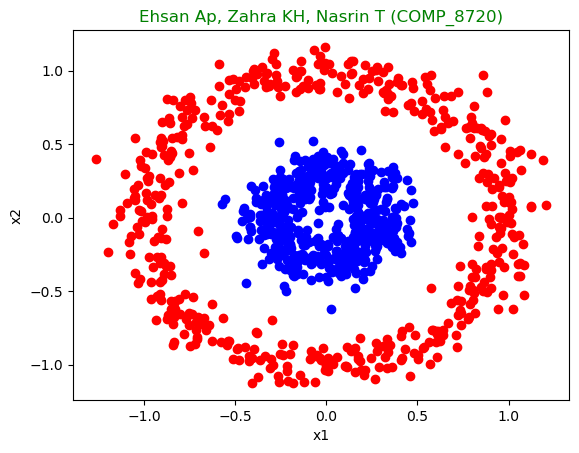

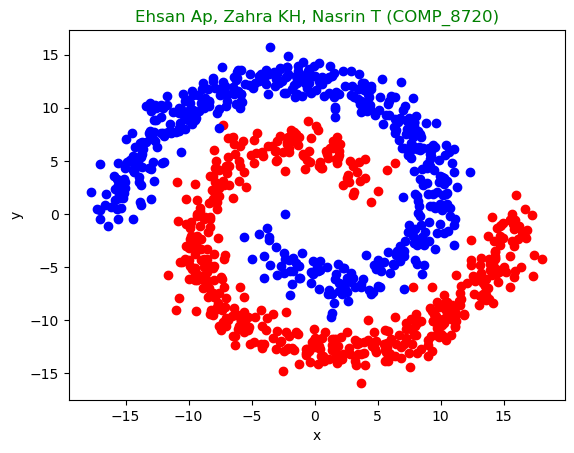

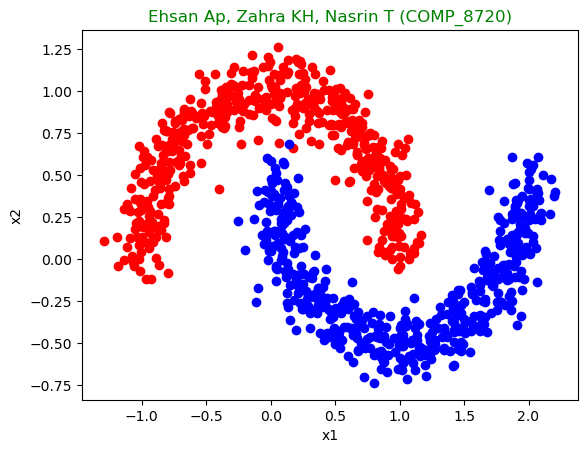

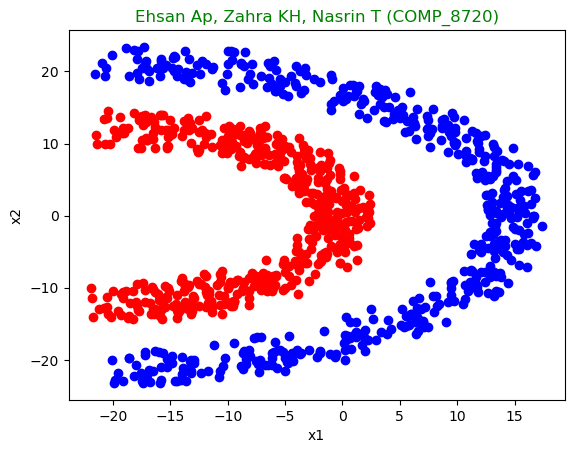

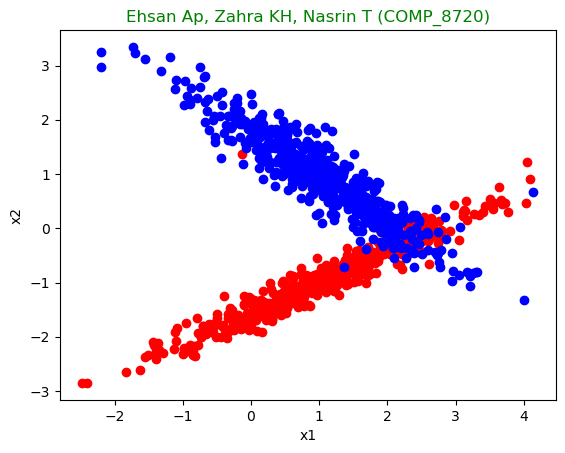

In [49]:
plt.scatter(cdf_circle_0.x1, cdf_circle_0.x2, color='red')
plt.scatter(cdf_circle_1.x1, cdf_circle_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(cdf_spiral_0.x, cdf_spiral_0.y, color='red')
plt.scatter(cdf_spiral_1.x, cdf_spiral_1.y, color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(moons_csv_0.x1, moons_csv_0.x2, color='red')
plt.scatter(moons_csv_1.x1, moons_csv_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(halfkernel_csv_0.x1, halfkernel_csv_0.x2, color='red')
plt.scatter(halfkernel_csv_1.x1, halfkernel_csv_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(twogaussians42_csv_0.x1, twogaussians42_csv_0.x2, color='red')
plt.scatter(twogaussians42_csv_1.x1, twogaussians42_csv_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

In [50]:
def calculate_xb_index(X, y, wcss):
    n_samples, n_features = X.shape
    centers = np.zeros((n_clusters, n_features))
    for i in range(n_clusters):
        centers[i] = np.mean(X[y == i], axis=0)
    d = np.sqrt(np.sum((X - centers[y]) ** 2, axis=1))
    return np.sum((d ** 2) / (n_samples * wcss))

def calculate_i_index(X, y):
    n_samples, n_features = X.shape
    centers = np.zeros((n_clusters, n_features))
    for i in range(n_clusters):
        centers[i] = np.mean(X[y == i], axis=0)
    min_distances = np.full((n_samples, n_clusters), np.inf)
    for i in range(n_clusters):
        min_distances[:, i] = np.sqrt(np.sum((X - centers[i]) ** 2, axis=1))
    I = np.min(min_distances, axis=1).mean()
    return np.sum((min_distances ** 2).sum(axis=1) / (n_samples * (I ** 2)))

# Circle

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Silhouette score (PCA): 0.31273297767747055
Silhouette score (kernel PCA): 0.5762346189251741


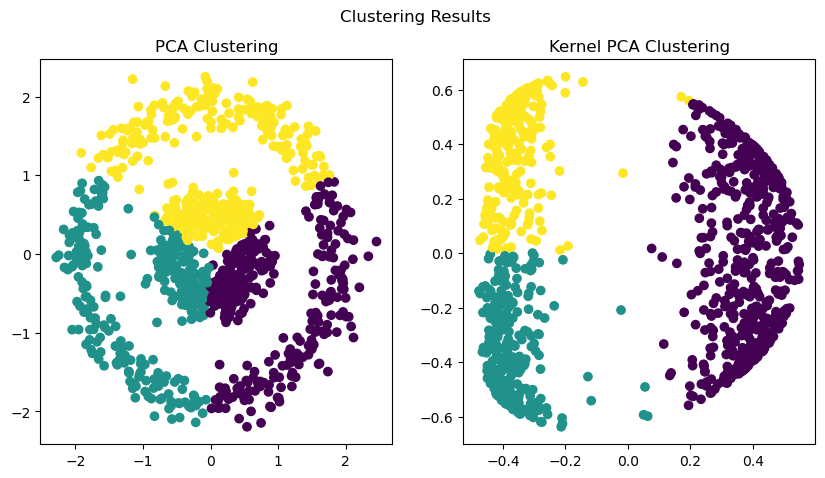

In [51]:
data = circle_csv

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(X_pca)
y_pred_pca = kmeans_pca.predict(X_pca)

kmeans_kpca = KMeans(n_clusters=3, random_state=42)
kmeans_kpca.fit(X_kpca)
y_pred_kpca = kmeans_kpca.predict(X_kpca)

silhouette_pca = silhouette_score(X_pca, y_pred_pca)
silhouette_kpca = silhouette_score(X_kpca, y_pred_kpca)

print("Silhouette score (PCA):", silhouette_pca)
print("Silhouette score (kernel PCA):", silhouette_kpca)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Clustering Results")

ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_pca)
ax1.set_title("PCA Clustering")

ax2.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_pred_kpca)
ax2.set_title("Kernel PCA Clustering")

plt.show()

In [52]:
data = circle_csv

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(X_pca)
y_pred_pca = kmeans_pca.predict(X_pca)

kmeans_kpca = KMeans(n_clusters=3, random_state=42)
kmeans_kpca.fit(X_kpca)
y_pred_kpca = kmeans_kpca.predict(X_kpca)

db_score_pca = davies_bouldin_score(X_pca, y_pred_pca)
db_score_kpca = davies_bouldin_score(X_kpca, y_pred_kpca)
ch_score_pca = calinski_harabasz_score(X_pca, y_pred_pca)
ch_score_kpca = calinski_harabasz_score(X_kpca, y_pred_kpca)
silhouette_pca = silhouette_score(X_pca, y_pred_pca)
silhouette_kpca = silhouette_score(X_kpca, y_pred_kpca)
ari_pca = adjusted_rand_score(y, y_pred_pca)
ari_kpca = adjusted_rand_score(y, y_pred_kpca)

n_clusters = 3
wcss_pca = kmeans_pca.inertia_
wcss_kpca = kmeans_kpca.inertia_

xb_score_pca = calculate_xb_index(X_pca, y_pred_pca, wcss_pca)
xb_score_kpca = calculate_xb_index(X_kpca, y_pred_kpca, wcss_kpca)
i_score_pca = calculate_i_index(X_pca, y_pred_pca)
i_score_kpca = calculate_i_index(X_kpca, y_pred_kpca)

scores = pd.DataFrame({
    'Metric': ['Davies-Bouldin', 'Calinski-Harabasz', 'Silhouette', 'Adjusted Rand Index', 'Xie-Beni Index', 'Index I'],
    'PCA': [db_score_pca, ch_score_pca, silhouette_pca, ari_pca, xb_score_pca, i_score_pca],
    'Kernel PCA': [db_score_kpca, ch_score_kpca, silhouette_kpca, ari_kpca, xb_score_kpca, i_score_kpca]
})
print(scores)

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

                Metric         PCA   Kernel PCA
0       Davies-Bouldin    1.011266     0.551557
1    Calinski-Harabasz  570.180552  1522.276516
2           Silhouette    0.312733     0.576235
3  Adjusted Rand Index   -0.000747     0.728807
4       Xie-Beni Index    0.001000     0.001000
5              Index I   11.336909    28.930366


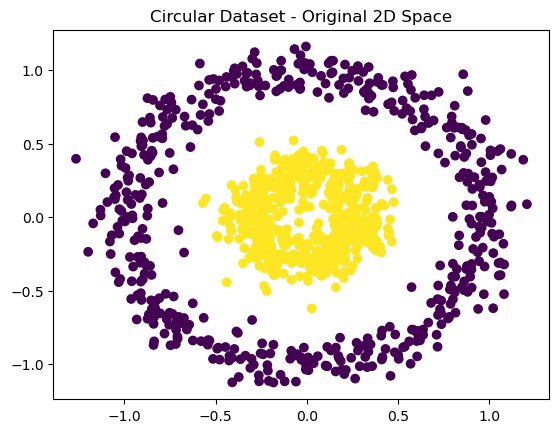

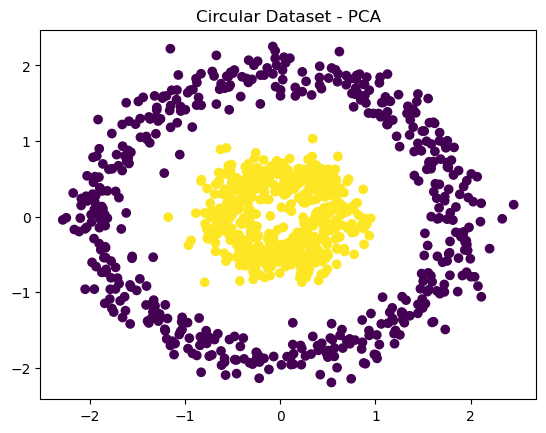

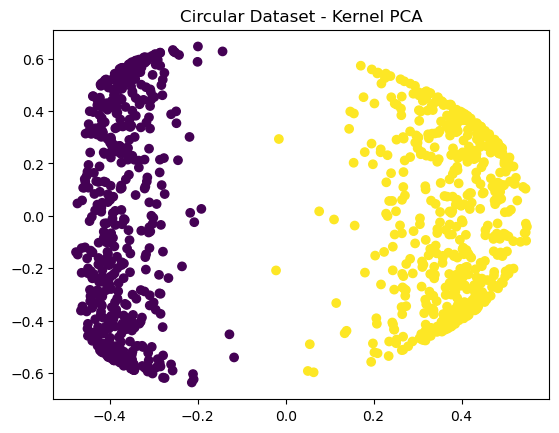

In [53]:
data = circle_csv

plt.scatter(data['x1'], data['x2'], c=data['label'])
plt.title('Circular Dataset - Original 2D Space')
plt.show()

X = data[['x1', 'x2']]
y = data['label']
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title('Circular Dataset - PCA')
plt.show()

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.title('Circular Dataset - Kernel PCA')
plt.show()

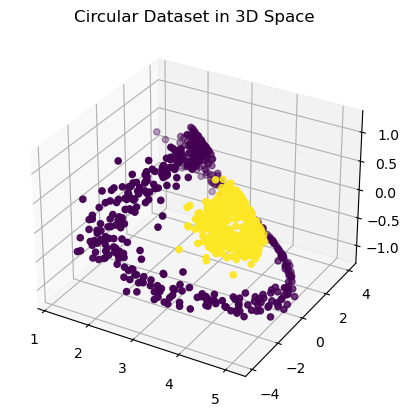

In [54]:
data = circle_csv

X = data[['x1', 'x2']]
y = data['label']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca = np.column_stack([X_pca, np.zeros((X_pca.shape[0], 1))]) # Add a column of zeros to project to 3D

n = X_pca.shape[0]
X_3d = np.zeros((n, 3))
X_3d[:, 0] = np.cos(X_pca[:, 0]) * (4 - X_pca[:, 1])
X_3d[:, 1] = np.sin(X_pca[:, 0]) * (4 - X_pca[:, 1])
X_3d[:, 2] = X_pca[:, 1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y)
plt.title('Circular Dataset in 3D Space')
plt.show()

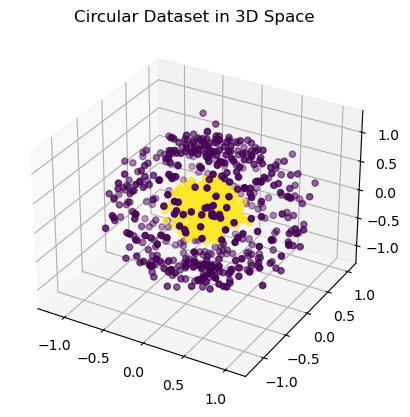

In [55]:
data = circle_csv

X = data[['x1', 'x2']]
y = data['label']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

n = X_pca.shape[0]
t = np.linspace(0, 4*np.pi, n)
X_3d = np.zeros((n, 3))
X_3d[:, 0] = X_pca[:, 0] * np.cos(t)
X_3d[:, 1] = X_pca[:, 0] * np.sin(t)
X_3d[:, 2] = X_pca[:, 1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y)
plt.title('Circular Dataset in 3D Space')
plt.show()

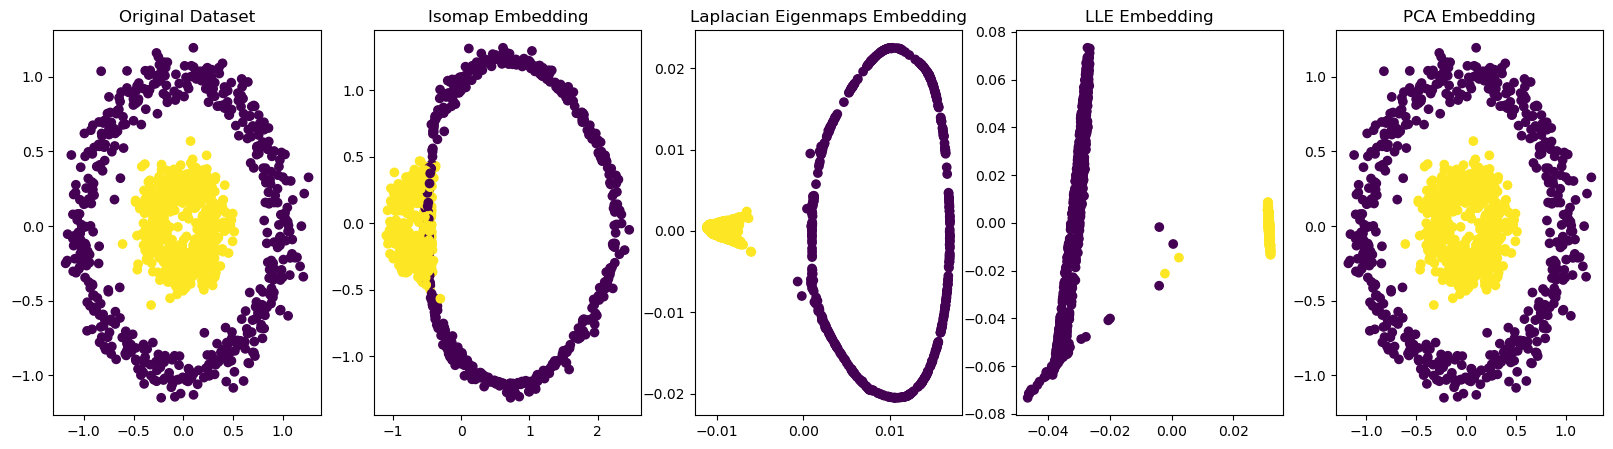

In [56]:
data = circle_csv

X = data[['x1', 'x2']]
y = data['label']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

n_neighbors = 10
isomap = Isomap(n_components=2, n_neighbors=n_neighbors)
X_iso = isomap.fit_transform(X)

laplacian = SpectralEmbedding(n_components=2, affinity='nearest_neighbors', n_neighbors=n_neighbors)
X_lap = laplacian.fit_transform(X)

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=n_neighbors, method='standard')
X_lle = lle.fit_transform(X)

fig, axs = plt.subplots(1, 5, figsize=(20, 5))

axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y)
axs[0].set_title('Original Dataset')

axs[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y)
axs[1].set_title('Isomap Embedding')

axs[2].scatter(X_lap[:, 0], X_lap[:, 1], c=y)
axs[2].set_title('Laplacian Eigenmaps Embedding')

axs[3].scatter(X_lle[:, 0], X_lle[:, 1], c=y)
axs[3].set_title('LLE Embedding')

axs[4].scatter(X_pca[:, 0], X_pca[:, 1], c=y)
axs[4].set_title('PCA Embedding')

plt.show()

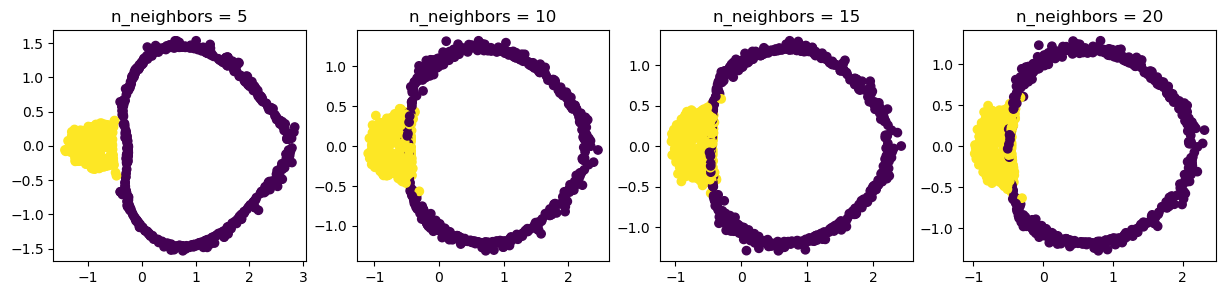

In [58]:
data = circle_csv

n_neighbors_range = [5, 10, 15, 20]
distance_metric = 'euclidean'

fig, axs = plt.subplots(1, len(n_neighbors_range), figsize=(15, 3))
for i, n_neighbors in enumerate(n_neighbors_range):
    isomap = Isomap(n_components=2, n_neighbors=n_neighbors, metric=distance_metric)
    X_iso = isomap.fit_transform(data[['x1', 'x2']])
    axs[i].scatter(X_iso[:, 0], X_iso[:, 1], c=data['label'])
    axs[i].set_title('n_neighbors = {}'.format(n_neighbors))

plt.show()

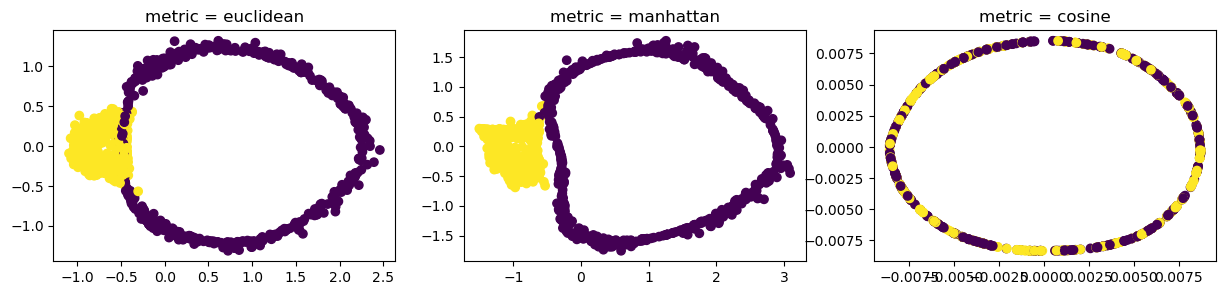

In [59]:
data = circle_csv

distance_metrics = ['euclidean', 'manhattan', 'cosine']

fig, axs = plt.subplots(1, len(distance_metrics), figsize=(15, 3))
for i, distance_metric in enumerate(distance_metrics):
    isomap = Isomap(n_components=2, n_neighbors=10, metric=distance_metric)
    X_iso = isomap.fit_transform(data[['x1', 'x2']])
    axs[i].scatter(X_iso[:, 0], X_iso[:, 1], c=data['label'])
    axs[i].set_title('metric = {}'.format(distance_metric))

plt.show()

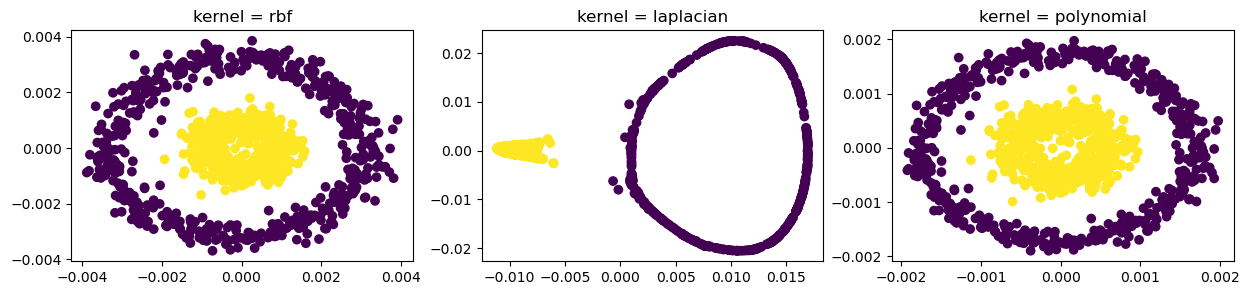

In [68]:
data = circle_csv

kernel_functions = ['rbf', 'laplacian', 'polynomial']

fig, axs = plt.subplots(1, len(kernel_functions), figsize=(15, 3))
for i, kernel_function in enumerate(kernel_functions):
    if kernel_function == 'rbf':
        laplacian = SpectralEmbedding(n_components=2, affinity='rbf', gamma=1.0, n_neighbors=10, random_state=42, eigen_solver='arpack')
    elif kernel_function == 'polynomial':
        kernel_matrix = polynomial_kernel(data[['x1', 'x2']], degree=3, coef0=1)
        laplacian = SpectralEmbedding(n_components=2, affinity='precomputed', n_neighbors=10, random_state=42, eigen_solver='arpack')
        X_lap = laplacian.fit_transform(kernel_matrix)
    else:
        laplacian = SpectralEmbedding(n_components=2, affinity='nearest_neighbors', n_neighbors=10, random_state=42, eigen_solver='arpack')
    if kernel_function != 'polynomial':
        X_lap = laplacian.fit_transform(data[['x1', 'x2']])
    axs[i].scatter(X_lap[:, 0], X_lap[:, 1], c=data['label'])
    axs[i].set_title('kernel = {}'.format(kernel_function))

plt.show()